<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/sakhshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#!pip uninstall tensorflow-gpu
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 1.4 MB 7.1 MB/s 
     |████████████████████████████████| 462 kB 60.8 MB/s 
     |████████████████████████████████| 5.8 MB 52.3 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling tensorboard-2.10.0:
      Successfully uninstalled tensorboard-2.10.0
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (63.0 MB/s)
(Reading database ... 155685 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155663 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [1]:
!nvidia-smi

Wed Sep  7 20:12:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.0'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
image_size = [224,224]
train_path = '/content/drive/MyDrive/noidaproject/train'
test_path = '/content/drive/MyDrive/noidaproject/test'

In [6]:
inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/noidaproject/train/*')

In [10]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)
# Model Object Creation
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# Model Structure
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
#model compilation
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
#import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
#target size should be equal as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/noidaproject/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 13573 images belonging to 100 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/noidaproject/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 500 images belonging to 100 classes.


In [18]:
len(test_set), len(training_set)

(32, 849)

In [19]:
# fit the model
r_model = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
849/849 [==============================] - 4066s 5s/step - loss: 14.6282 - accuracy: 0.5437 - val_loss: 6.1433 - val_accuracy: 0.7840
Epoch 2/10
849/849 [==============================] - 189s 222ms/step - loss: 8.6736 - accuracy: 0.7466 - val_loss: 7.3145 - val_accuracy: 0.7780
Epoch 3/10
849/849 [==============================] - 190s 223ms/step - loss: 6.9302 - accuracy: 0.8113 - val_loss: 6.4069 - val_accuracy: 0.8180
Epoch 4/10
849/849 [==============================] - 189s 223ms/step - loss: 6.2142 - accuracy: 0.8370 - val_loss: 5.4096 - val_accuracy: 0.8580
Epoch 5/10
849/849 [==============================] - 188s 221ms/step - loss: 5.7969 - accuracy: 0.8608 - val_loss: 8.3179 - val_accuracy: 0.8500
Epoch 6/10
849/849 [==============================] - 188s 221ms/step - loss: 5.2136 - accuracy: 0.8749 - val_loss: 7.3724 - val_accuracy: 0.8640
Epoch 7/10
849/849 [==============================] - 188s 221ms/step - loss: 5.1109 - accuracy: 0.8824 - val_loss: 7.8260 - 

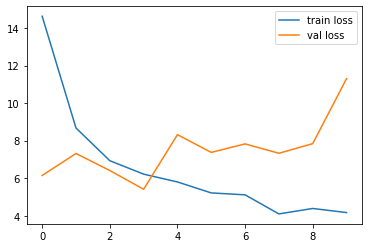

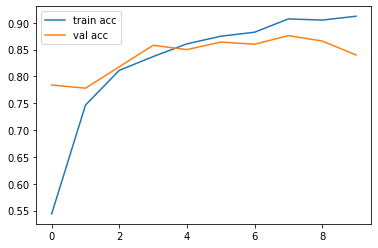

<Figure size 432x288 with 0 Axes>

In [21]:
# loss plot
plt.plot(r_model.history['loss'], label='train loss')
plt.plot(r_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy plot
plt.plot(r_model.history['accuracy'], label='train acc')
plt.plot(r_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save the model
from tensorflow.keras.models import load_model
model.save('SportClassification.h5')

In [33]:
y_hat = model.predict(test_set)
y_hat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
y_hat = np.argmax(y_hat, axis=1)
y_hat

array([ 0, 97, 89, 33, 79, 18, 36,  3, 78, 96, 39, 90, 50, 87, 66, 81, 49,
        4, 71, 21, 52,  9, 69, 60, 21, 35,  1, 48,  0,  9, 55, 77, 50,  7,
       54, 65, 34, 99, 50, 68, 37, 99, 43,  8, 80, 16, 13, 82,  8, 10, 75,
       25, 67, 38, 77, 35,  2, 72, 74, 84, 40, 52,  4, 15, 56, 62, 65, 31,
       58, 66, 47,  2,  5, 25, 72, 72,  6, 62, 20,  7, 94, 33, 16, 35,  9,
       67, 87, 39, 31, 35, 58, 11,  8, 43, 56,  8, 39, 88, 51, 56, 34, 88,
       35,  6, 54, 72, 88, 92, 76, 10, 88, 60, 19, 51, 89,  2, 95, 44, 96,
       47, 35, 84, 40, 30, 19, 10, 38, 59, 21, 42, 39, 20, 40, 64, 74, 37,
       73, 90,  6, 99, 75, 15, 94, 48, 39, 86, 17, 71, 43, 73, 66, 83, 89,
       43, 98, 30, 40, 56, 92, 57, 36, 66, 66,  8, 37, 76,  5, 54, 65, 48,
       32, 45, 18, 16, 93, 10,  0, 86, 36, 13, 57, 46,  5, 16, 97, 27, 85,
       34, 29,  3, 61, 57, 85, 26,  1, 50,  6, 24, 65, 88, 44, 57, 25, 54,
       35, 59, 32, 17, 72, 26, 86, 26, 89, 63, 71, 48, 22, 80, 41, 94,  8,
       48,  8, 56, 61,  8